In [1]:
#Boston Housing dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv("/content/HousingData.csv")
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [5]:
df=df.dropna()

In [6]:
X=df.drop("MEDV",axis=1)
y=df["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)


In [7]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {mse}")

Mean Squared Error: {mse}


In [34]:
# @title sms spam
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv("/content/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
df.duplicated().sum()

403

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.duplicated().sum()

0

In [45]:
df.dropna(how="any",inplace=True,axis=1)
df.columns=["label","message"]


In [46]:
feat=df[['label','message']]
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [47]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


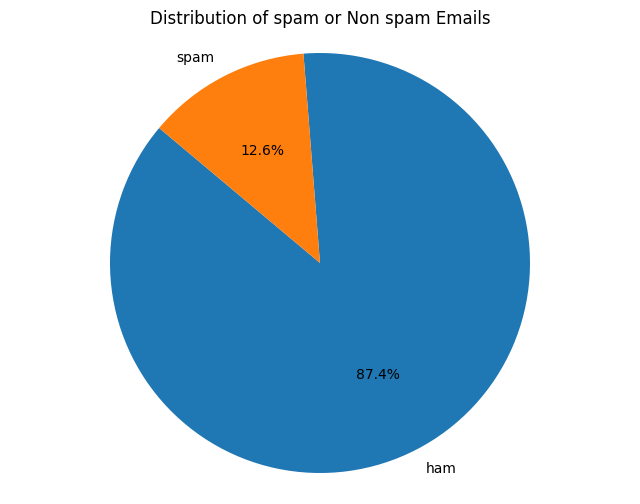

In [48]:
plt.figure(figsize=(8,6))
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of spam or Non spam Emails')
plt.axis('equal')
plt.show()

In [50]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
ps=PorterStemmer()
def preprocess_message(message):
    message=message.lower()
    message=re.sub('[^a-zA-Z]',' ',message)
    message=message.split()
    message=[ps.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message=' '.join(message)
feat['message']=feat['message'].apply(preprocess_message)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5572)
x= vectorizer.fit_transform(df['message']).toarray()
y= df['label'].map({'ham': 0, 'spam': 1})

In [54]:
y.shape

(5169,)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
print(y_train.value_counts())

label
0    3627
1     508
Name: count, dtype: int64


In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nb_model=MultinomialNB()
nb_model.fit(x_train,y_train)
y_pred=nb_model.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9671
Confusion Matrix:
[[889   0]
 [ 34 111]]
